# Myopia Clusters

### Part 1: Prepare the Data

In [1]:
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

#### 1. Read `myopia.csv` into a Pandas DataFrame.

In [2]:
file_path = Path("myopia.csv")
data = pd.read_csv(file_path)
data.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
labels = data["MYOPIC"]
labels

0      1
1      0
2      0
3      1
4      0
      ..
613    1
614    0
615    0
616    0
617    0
Name: MYOPIC, Length: 618, dtype: int64

In [4]:
# List dataframe data types
data.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

 #### 2. Remove the "MYOPIC" column from the dataset.

In [5]:
# Remove the MYOPIC Column
drop_data = data.drop(['MYOPIC'], axis=1)
drop_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
# Find null values
for column in drop_data.columns:
    print(f"Column {column} has {drop_data[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [7]:
# Find duplicate entries
print(f"Duplicate entries: {drop_data.duplicated().sum()}")

Duplicate entries: 0


#### 3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with  smaller values.

In [8]:
# Standarize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(drop_data)
scaled_data[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

### Part 2: Apply Dimensionality Reduction

1. Perform dimensionality reduction with PCA. How did the number of the features change?
2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation. 

3. Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [9]:
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(scaled_data)
# pca.explained_variance_ratio_
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [45]:
#Initialize the t-SNE model
tsne = TSNE(learning_rate=100, n_components=2, perplexity=50, verbose=1)
tsne_features = tsne.fit_transform(pca_data)


C:\Users\hanab\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.003s...
[t-SNE] Computed neighbors for 618 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.014519
[t-SNE] KL divergence after 1000 iterations: 1.039664


In [46]:
tsne_features.shape

(618, 2)

In [47]:
tsne = pd.DataFrame(
    data=tsne_features,
    columns=["X", "Y"],
)
tsne.head()

,X,Y
0,9.818220,4.791928
1,9.680244,-2.743080
2,-6.516227,-2.883131
3,1.551222,12.131989
4,-2.028347,-5.345634


In [48]:
drop_data["X"] = tsne_features[:,0]
drop_data["y"] = tsne_features[:,1]
drop_data["Myopic"] = data["MYOPIC"]
drop_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,X,y,Myopic
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,9.818220,4.791928,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,9.680244,-2.743080,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-6.516227,-2.883131,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1.551222,12.131989,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,-2.028347,-5.345634,0


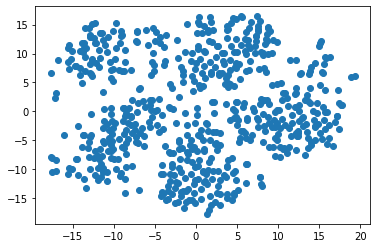

In [49]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

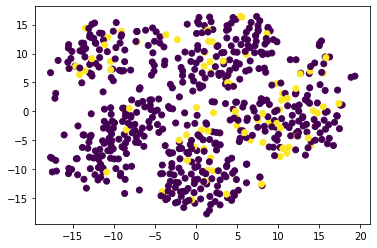

In [50]:
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

In [51]:
labels = drop_data["Myopic"]
labels.value_counts()

0    537
1     81
Name: Myopic, dtype: int64

### Part 3: Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

* Use a `for` loop to determine the inertia for each `k` between 1 through 10. 

* If possible, determine where the elbow of the plot is, and at which value of `k` it appears.

In [52]:
PC_data = pd.DataFrame(data=pca_data, columns=["PC 1", "PC 2", "PC  3","PC  4","PC  5","PC  6", "PC  7", "PC  8","PC  9", "PC  10"])
PC_data.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [53]:
# Calculate the inertia for the range of k values
# Create the Elbow Curve

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(PC_data)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
elbow = pd.DataFrame(elbow_data)
elbow

C:\Users\hanab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\hanab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\hanab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\hanab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589
5,6,5149.524688
6,7,4925.071941
7,8,4756.274760
8,9,4596.931418
9,10,4483.539918


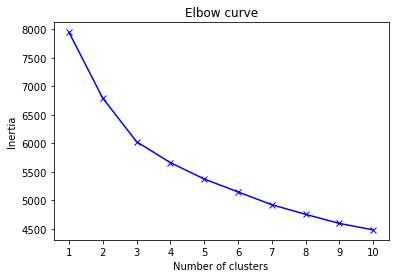

In [54]:
plt.plot(elbow['k'], elbow['inertia'], 'bx-' )
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

In [55]:
len(pca.components_)

10

In [56]:
# Initialize the K-Means model
def get_clusters(k, PC_data):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(PC_data)
    predictions = model.predict(PC_data)
    PC_data["class"] = model.labels_
    return PC_data

clusters = get_clusters(3,PC_data)
clusters.head()

C:\Users\hanab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


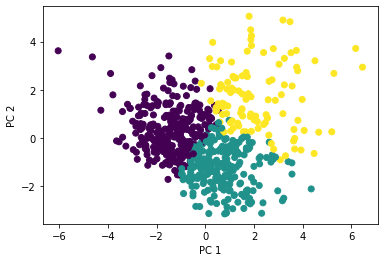

In [57]:
def show_clusters(PC_data):
    plt.scatter(PC_data['PC 1'], PC_data['PC 2'],  
                c=PC_data['class'])
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.show()
show_clusters(clusters)

### Part 4: Make a Recommendation

Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters? 


Based on this sample data Results are inconclusive,

It is hard to tell whether patients can be clustered or not, because the elbow curve does not show specific point. The optimal number of clusters for this analysis is not clear, elbow plot shows it looks like  k=3.but still it is not clear. 